# Libraries

In [1]:
# Improt Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import tensorflow_model_optimization as tfmot

In [2]:
pd.options.display.max_colwidth= None

# Loading Data 

In [3]:
# Loading Train and Test Set of the Data set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Shape of the Train and test set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Data Inspection

In [4]:
# 2-D Training data
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5
0
4
1
9


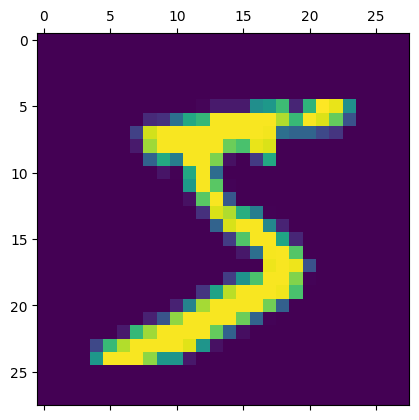

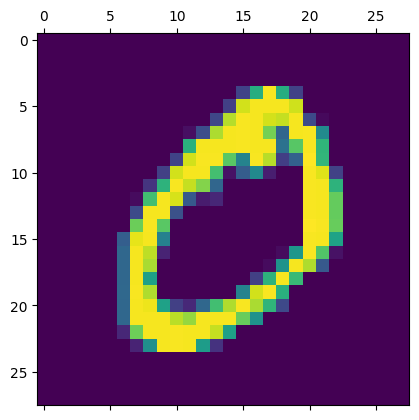

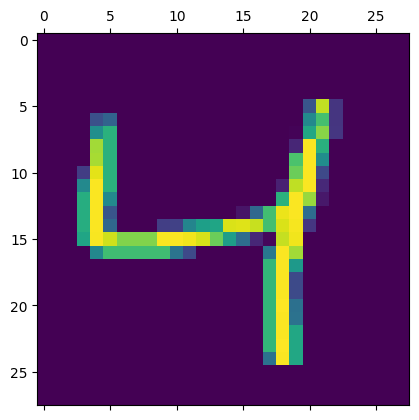

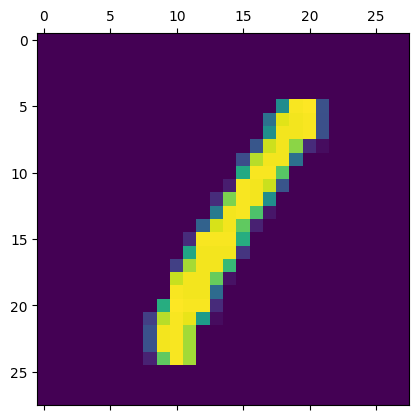

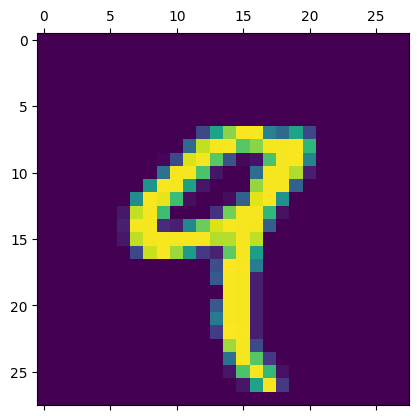

In [5]:
for i in range(5):
    print(y_train[i])
    plt.matshow(X_train[i])

# Data Rescalling 

### To improve the Accuracy

In [6]:
X_train = X_train/255
X_test = X_test/255

# Model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2740 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1251 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0537 - accuracy: 0.9836


# Evaluate the Model

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9744


[0.09157025814056396, 0.974399983882904]

# Prediction

In [9]:
predicted = model.predict(X_test)
predicted[1]

313/313 [==============================] - 0s 1ms/step


array([1.5588672e-01, 8.9912945e-01, 9.9999952e-01, 1.8110499e-01,
       4.0006243e-10, 3.0853680e-01, 2.3154939e-02, 5.1529860e-06,
       7.1414745e-01, 5.1862585e-09], dtype=float32)

In [10]:
predicted[1].argmax()

2

# Evaluation Matrix

In [11]:
# Create Predicted_label
y_predicted_label = [i.argmax() for i in predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [12]:
# Print Confiusion Matrix
tf.math.confusion_matrix(y_test, y_predicted_label)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    2,    0,    0,    1,    1,    1,    2,    0],
       [   0, 1125,    5,    0,    0,    1,    2,    1,    1,    0],
       [   6,    1, 1010,    1,    1,    0,    1,   10,    2,    0],
       [   0,    0,   11,  979,    0,    3,    0,   10,    7,    0],
       [   0,    1,    6,    0,  961,    1,    6,    2,    2,    3],
       [   2,    1,    0,   12,    3,  860,    3,    3,    8,    0],
       [   6,    3,    3,    1,    7,    4,  932,    1,    1,    0],
       [   0,    4,   10,    2,    0,    0,    0, 1008,    0,    4],
       [   2,    0,    7,    5,    3,    3,    3,    5,  945,    1],
       [   3,    6,    0,    6,   13,    8,    0,   12,   10,  951]])>

# Plot Confuson Matrix

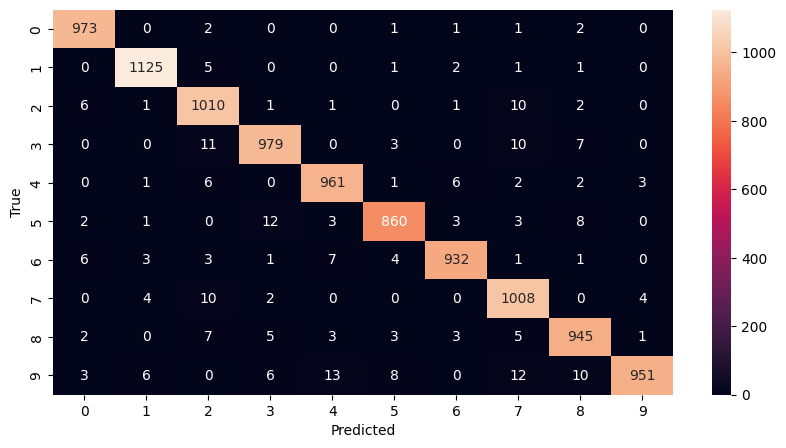

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(tf.math.confusion_matrix(y_test, y_predicted_label), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('True');

In [14]:
# Saving the Training Model 
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


# 

# 

# 1.Post Training Qunatization

### # Quantisation of Weights


In [15]:
# Convert to Lite mdoel
converter = tf.lite.TFLiteConverter.from_saved_model('./saved_model')
tflite_model = converter.convert()

In [16]:
len(tflite_model)

320004

In [17]:
# Quantisation of Weights (from_saved_model=load from local machine)
converter = tf.lite.TFLiteConverter.from_saved_model('./saved_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [18]:
len(tflite_model)

320004

In [19]:
with open('tflite_model.tflite', 'wb') as f:
    f.write(tflite_model)

with open('tflite_quant_model.tflite', 'wb') as f:
    f.write(tflite_quant_model)

# 2. Quantization aware Training 

In [20]:
quantize_model = tfmot.quantization.keras.quantize_model
quant_aware_model = quantize_model(model)

# Fit the Quant Model
quant_aware_model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
quant_aware_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0445 - accuracy: 0.9864
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0243 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0189 - accuracy: 0.9947


# Evaluate 

In [21]:
quant_aware_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9742


[0.09606711566448212, 0.9742000102996826]

In [22]:
# Converting the Quantized model (from_keras_model=load from memory)
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_aware_model = converter.convert()

# Save the File 
with open('tflite_quant_aware_model.tflite', 'wb') as f:
    f.write(tflite_quant_aware_model)

INFO:tensorflow:Assets written to: C:\Users\emage\AppData\Local\Temp\tmp_c8cid_g\assets


INFO:tensorflow:Assets written to: C:\Users\emage\AppData\Local\Temp\tmp_c8cid_g\assets
C:\Users\emage\anaconda3\envs\cudaenvs\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
